# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

-Null Hypothesis: User behavior between old landing page and new landing page is independent

-Alternative Hypothesis: User behavior between old landing page and new landing page is dependent to the new feature

-Measure the difference in user behavior between control group and treatment group

-Test the effectiveness by inspecting conversion rate

-Perform statistical analysis to prove null or alternative hypothesis

-Inspect time spent, conversion rate, and other bivariate analysis to measure the relationship between variables

## Import all the necessary libraries

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

## Reading the Data into a DataFrame

In [109]:
df = pd.read_csv('/Users/nadiyazaver/Downloads/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [26]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [27]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [28]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [30]:
df.isna().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [31]:
df.shape

(100, 6)

In [32]:
df.duplicated().sum()

0

In [33]:
df.describe(include = 'all')

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.000000,100,100,100.000000,100,100
unique,NaN,2,2,NaN,2,3
top,NaN,control,old,NaN,yes,Spanish
freq,NaN,50,50,NaN,54,34
mean,546517.000000,NaN,NaN,5.377800,NaN,NaN
std,52.295779,NaN,NaN,2.378166,NaN,NaN
min,546443.000000,NaN,NaN,0.190000,NaN,NaN
25%,546467.750000,NaN,NaN,3.880000,NaN,NaN
50%,546492.500000,NaN,NaN,5.415000,NaN,NaN
75%,546567.250000,NaN,NaN,7.022500,NaN,NaN


In [110]:
control_data = df[df['group'] == 'control']

In [111]:
control_data['group'].unique()

array(['control'], dtype=object)

In [112]:
treatment_data = df[df['group'] == 'treatment']

In [113]:
treatment_data['group'].unique()

array(['treatment'], dtype=object)

In [114]:
control_data.describe(include='all')

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,50.00000,50,50,50.000000,50,50
unique,NaN,1,1,NaN,2,3
top,NaN,control,old,NaN,no,Spanish
freq,NaN,50,50,NaN,29,17
mean,546566.50000,NaN,NaN,4.532400,NaN,NaN
std,17.67767,NaN,NaN,2.581975,NaN,NaN
min,546493.00000,NaN,NaN,0.190000,NaN,NaN
25%,546555.25000,NaN,NaN,2.720000,NaN,NaN
50%,546567.50000,NaN,NaN,4.380000,NaN,NaN
75%,546579.75000,NaN,NaN,6.442500,NaN,NaN


In [115]:
treatment_data.describe(include = 'all')

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,50.00000,50,50,50.000000,50,50
unique,NaN,1,1,NaN,2,3
top,NaN,treatment,new,NaN,yes,Spanish
freq,NaN,50,50,NaN,33,17
mean,546467.50000,NaN,NaN,6.223200,NaN,NaN
std,14.57738,NaN,NaN,1.817031,NaN,NaN
min,546443.00000,NaN,NaN,1.650000,NaN,NaN
25%,546455.25000,NaN,NaN,5.175000,NaN,NaN
50%,546467.50000,NaN,NaN,6.105000,NaN,NaN
75%,546479.75000,NaN,NaN,7.160000,NaN,NaN


### Univariate Analysis

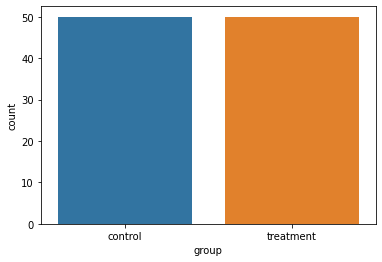

In [47]:
sns.countplot(data=df, x = 'group');
#50 users in control group, 50 users in treatment group

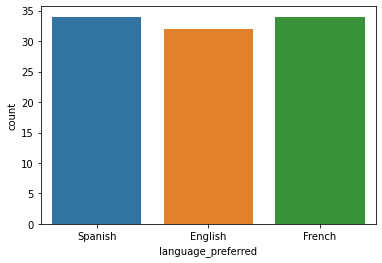

In [50]:
sns.countplot(data = df, x= 'language_preferred');
#English is the least preferred language, Spanish and French are equally preferred

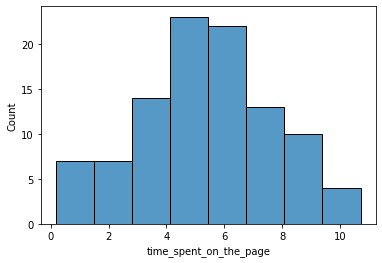

In [52]:
sns.histplot(data=df, x = 'time_spent_on_the_page');
#the time spent when combining both groups has a normal distribution

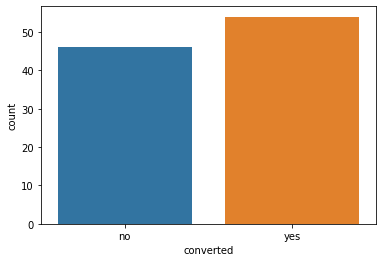

In [104]:
sns.countplot(data = df, x ='converted');
#The overall decision to convert is higher than not choosing to convert

### Bivariate Analysis

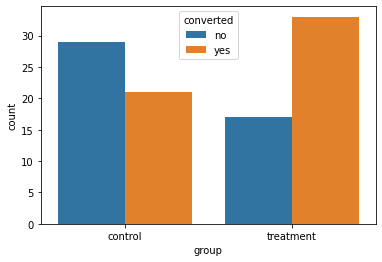

In [6]:
sns.countplot(data = df, x = 'group', hue = 'converted');
#Relationship between group type and conversion rate

In [13]:
converted = df[df['converted'] == 'yes']
converted['converted'].unique()

array(['yes'], dtype=object)

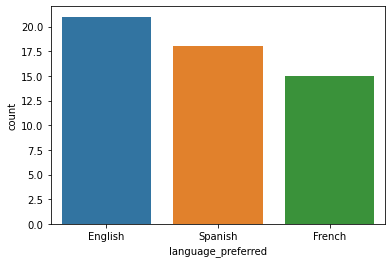

In [14]:
sns.countplot(data = converted, x = 'language_preferred');
#Out of users that converted, the most preferred language is English, the least is French

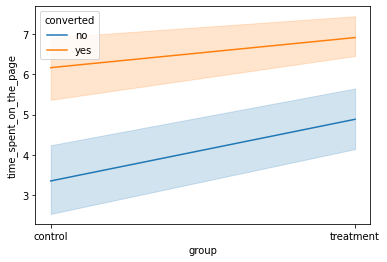

In [36]:
sns.lineplot(data = df, x = 'group', y = 'time_spent_on_the_page', hue = 'converted');
#Relationship between time spent on a page and the decision to convert

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

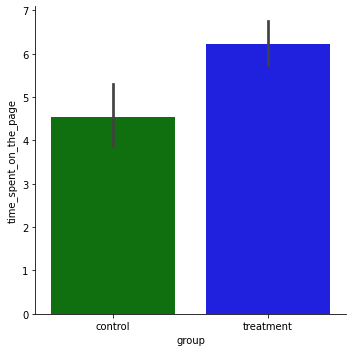

In [51]:
sns.catplot(data = df, x = 'group', y = 'time_spent_on_the_page', kind = 'bar', palette = ['green','blue'] );

### Step 1: Define the null and alternate hypotheses

- Null Hypothesis: Users spend equal amount of average time on new and existing landing page.

- Alternative Hypothesis: Users spend different amount of average time on new and existing landing page.

### Step 2: Select Appropriate test

 Two independent sample t-test

### Step 3: Decide the significance level

0.05

### Step 4: Collect and prepare data

In [55]:
control_data['group'].unique()

array(['control'], dtype=object)

In [56]:
treatment_data['group'].unique()

array(['treatment'], dtype=object)

### Step 5: Calculate the p-value

In [107]:
from scipy.stats import ttest_ind

In [60]:
test_stat, p_value = ttest_ind(control_data['time_spent_on_the_page'], treatment_data['time_spent_on_the_page'], equal_var = True, alternative = 'two-sided')
                               

In [64]:
 print('The p value is ' +str(p_value))

The p value is 0.000263224705619001


### Step 6: Compare the p-value with $\alpha$

In [66]:
print('The p value of ' +str(p_value), 'is lower than 0.05 significance level')

The p value of 0.000263224705619001 is lower than 0.05 significance level


### Step 7:  Draw inference

We have enough evidence o reject the null hypothesis, and enough statistical evidence to say that the average time spent on old landing page compared to new landing page is different.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

-Null Hypothesis: Conversion status and group type are independent

-Alternative Hypothesis: Conversion status and group type are not independent

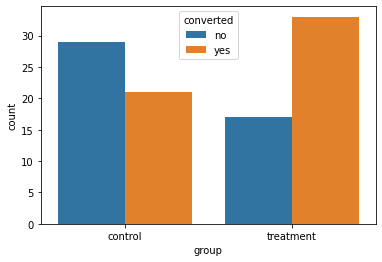

In [97]:
sns.countplot(data = df, x = 'group', hue = 'converted');

In [90]:
contingency_table = pd.crosstab(df['group'], df['converted'])
contingency_table
#Control data had a conversion proportion of 21/50, treatment data had a conversion proportion of 33/50

converted,no,yes
group,,
control,29,21
treatment,17,33


In [91]:
from scipy.stats import chi2_contingency

In [92]:
chi2, pval, dof, exp_freq = chi2_contingency(contingency_table)

In [98]:
print('The p-value is', pval)

The p-value is 0.02730889175492232


Inference-

A p value of 0.03 is enough evidence to reject the null hypothesis

## 3. Is the conversion and preferred language are independent or related?

In [99]:
contingency_table_1 = pd.crosstab(df['converted'], df['language_preferred'])
contingency_table_1

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [100]:
chi2, pval,dof, exp_freq = chi2_contingency(contingency_table_1)

In [101]:
print('The p value is', pval)

The p value is 0.21298887487543447


Inference -

We do not have enough statistical evidence to say that the conversion rate and preferred language are related

## 4. Is the time spent on the new page same for the different language users?

In [116]:
from scipy.stats import levene

In [118]:
statistic, p_value = levene (treatment_data['time_spent_on_the_page'][treatment_data['language_preferred'] == 'Spanish'],
                              treatment_data['time_spent_on_the_page'][treatment_data['language_preferred'] == 'French'],
                              treatment_data['time_spent_on_the_page'][treatment_data['language_preferred'] == 'English'])

In [119]:
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Inference -

Since the p-value is larger than 0.05, we fail to reject the null hypothesis that states the population variances are equal.

## Conclusion and Business Recommendations

1. From our dataset, the conversion rate was 54%
2. The conversion rate in the treatment group was 66%, while the conversion rate in the control group was 42%
3. Out of the converted users, the most preferred language was English
4. Users spent more time on the new landing page vs the old one
5. I would also request a field that intakes user's age to determine which age group each page captivates
6. Prompt user to participate in a quick poll after 20 seconds of landing on the page, to determine if they're satisfied with their experience so far
7. Display a temporary coupon or promo code to spark urgency in converting
8. Inspect the formatting on the page to ensure that the appropriate headlines and words are emphasized to maintain user's attention

___